# Amazon 'All Beauty' Category Analysis

**Author:** Adithi Balajee  
**Course:** Data Science @ CCM  
**Date:** Spring 2025

### Project Overview

This project explores customer reviews from Amazon's *All Beauty* product category. The dataset includes both review content and product metadata (such as brand, category, and images), offering a detailed look into customer sentiment and product performance.

The goal is to clean, merge, and analyze the data to answer meaningful questions about consumer behavior and product trends.


The dataset is *sourced* from [Amazon Review Data (2018)](https://nijianmo.github.io/amazon/index.html 'Amazon Review Data (2018)'), a study done by a now graduated grad student (Jianmo Ni), at UCSD


---

## Key Research Questions

1. Do verified purchase reviews differ in rating compared to unverified ones?
2. Are there temporal trends in reviews — do ratings trend higher or lower over time?
3. Which brands receive the most consistent ratings?¶
4. Is there a correlation between the sentiment of review text and the star rating?

## Import the Required Libraries

In [302]:
import pandas as pd
import json
import seaborn as sns
import matplotlib.pyplot as plt
from textblob import TextBlob

## Convert the JSON Review and Metadata Files to CSV Format

- I loaded two JSON files:
  - `All_Beauty.json` (contains product reviews)
  - `meta_All_Beauty.json` (contains metadata like brand, price, category)
- Each file is read line by line and converted into a pandas DataFrame.
- Finally, I exported each DataFrame to a CSV for easier handling and merging later.

This step transforms the semi-structured JSON format into CSV format.


In [304]:
json_path = '/Users/adithibalajee/Downloads/All_Beauty.json'
json_path2 = '/Users/adithibalajee/Downloads/meta_All_Beauty.json'

In [305]:
with open(json_path, 'r') as file:
    data = [json.loads(line) for line in file]

# Convert to DataFrame
dfONE = pd.DataFrame(data)

# Save to CSV
dfONE.to_csv('All_Beauty_5_Review.csv', index=False)

print("Successfully saved to All_Beauty_5.csv")


Successfully saved to All_Beauty_5.csv


- The is the same code as prior, but is called on the metadata file, and then saved to a csv, so I can easily merge the files.
- The metadata file is now a csv, and saved to a CSV. 


In [297]:
with open(json_path2, 'r') as file:
    data = [json.loads(line) for line in file]

# Convert to DataFrame
dfTWO = pd.DataFrame(data)

# Save to CSV
dfTWO.to_csv('All_Beauty_5_metadata.csv', index=False)

print("Successfully saved to All_Beauty_5_metadata.csv")


Successfully saved to All_Beauty_5_metadata.csv


- Now, I performed a set opeation to see which columns are shared in both of the CSV files, so I can use that column as the key to merge on. 

In [312]:
list(set(dfONE.columns) & set(dfTWO.columns))

['asin']

## Step 3: Merge the Review Data with Metadata

- Now that we have two clean CSVs, I merged them on the common column `asin`, which acts as the unique product ID.
- We perform an inner join so that only records with matching review and metadata entries are retained.
- The merged file `All_Beauty_5_merged.csv` contains both review content and product details.


In [314]:
reviews_df = pd.read_csv('All_Beauty_5.csv')
metadata_df = pd.read_csv('All_Beauty_5_metadata.csv')

# Merge on 'asin'
dfOG = pd.merge(reviews_df, metadata_df, on='asin', how='inner')

# Save the merged data
dfOG.to_csv('All_Beauty_5_merged.csv', index=False)

print("Successfully merged and saved as All_Beauty_5_merged.csv")


/var/folders/k7/6ch_rrvj2x95fb13z7tcqvd80000gn/T/ipykernel_3741/2151243820.py:2: DtypeWarning: Columns (1,14) have mixed types. Specify dtype option on import or set low_memory=False.
  metadata_df = pd.read_csv('All_Beauty_5_metadata.csv')


Successfully merged and saved as All_Beauty_5_merged.csv


In [325]:
dfOG.describe()

,overall,unixReviewTime,fit,tech2
count,5767.000000,5.767000e+03,0.0,0.0
mean,4.770591,1.442242e+09,NaN,NaN
std,0.751169,5.440093e+07,NaN,NaN
min,1.000000,1.095725e+09,NaN,NaN
25%,5.000000,1.407586e+09,NaN,NaN
50%,5.000000,1.447114e+09,NaN,NaN
75%,5.000000,1.481674e+09,NaN,NaN
max,5.000000,1.534982e+09,NaN,NaN


In [330]:
dfOG.columns

Index(['overall', 'verified', 'reviewTime', 'reviewerID', 'asin', 'style',
       'reviewerName', 'reviewText', 'summary', 'unixReviewTime', 'vote',
       'image', 'category', 'tech1', 'description', 'fit', 'title', 'also_buy',
       'tech2', 'brand', 'feature', 'rank', 'also_view', 'details', 'main_cat',
       'similar_item', 'date', 'price', 'imageURL', 'imageURLHighRes'],
      dtype='object')

In [332]:
dfOG.shape

(5767, 30)

In [334]:
dfOG.dtypes

overall              int64
verified              bool
reviewTime          object
reviewerID          object
asin                object
style               object
reviewerName        object
reviewText          object
summary             object
unixReviewTime       int64
vote                object
image               object
category            object
tech1               object
description         object
fit                float64
title               object
also_buy            object
tech2              float64
brand               object
feature             object
rank                object
also_view           object
details             object
main_cat            object
similar_item        object
date                object
price               object
imageURL            object
imageURLHighRes     object
dtype: object

In [318]:
dfOG.head()    

,overall,verified,reviewTime,reviewerID,asin,style,reviewerName,reviewText,summary,unixReviewTime,...,feature,rank,also_view,details,main_cat,similar_item,date,price,imageURL,imageURLHighRes
0,5,True,"09 1, 2016",A3CIUOJXQ5VDQ2,B0000530HU,"{'Size:': ' 7.0 oz', 'Flavor:': ' Classic Ice ...",Shelly F,As advertised. Reasonably priced,Five Stars,1472688000,...,[],"65,003 in Beauty & Personal Care (","['B01I9TIY1U', 'B07L1PZCS7', 'B01N12C89Y', 'B0...",{'\n Product Dimensions: \n ': '3 x 4 x ...,All Beauty,NaN,NaN,NaN,['https://images-na.ssl-images-amazon.com/imag...,['https://images-na.ssl-images-amazon.com/imag...
1,5,True,"09 1, 2016",A3CIUOJXQ5VDQ2,B0000530HU,"{'Size:': ' 7.0 oz', 'Flavor:': ' Classic Ice ...",Shelly F,As advertised. Reasonably priced,Five Stars,1472688000,...,[],"65,003 in Beauty & Personal Care (","['B01I9TIY1U', 'B07L1PZCS7', 'B01N12C89Y', 'B0...",{'\n Product Dimensions: \n ': '3 x 4 x ...,All Beauty,NaN,NaN,NaN,['https://images-na.ssl-images-amazon.com/imag...,['https://images-na.ssl-images-amazon.com/imag...
2,5,True,"11 14, 2013",A3H7T87S984REU,B0000530HU,"{'Size:': ' 7.0 oz', 'Flavor:': ' Classic Ice ...",houserules18,Like the oder and the feel when I put it on my...,Good for the face,1384387200,...,[],"65,003 in Beauty & Personal Care (","['B01I9TIY1U', 'B07L1PZCS7', 'B01N12C89Y', 'B0...",{'\n Product Dimensions: \n ': '3 x 4 x ...,All Beauty,NaN,NaN,NaN,['https://images-na.ssl-images-amazon.com/imag...,['https://images-na.ssl-images-amazon.com/imag...
3,5,True,"11 14, 2013",A3H7T87S984REU,B0000530HU,"{'Size:': ' 7.0 oz', 'Flavor:': ' Classic Ice ...",houserules18,Like the oder and the feel when I put it on my...,Good for the face,1384387200,...,[],"65,003 in Beauty & Personal Care (","['B01I9TIY1U', 'B07L1PZCS7', 'B01N12C89Y', 'B0...",{'\n Product Dimensions: \n ': '3 x 4 x ...,All Beauty,NaN,NaN,NaN,['https://images-na.ssl-images-amazon.com/imag...,['https://images-na.ssl-images-amazon.com/imag...
4,1,True,"08 18, 2013",A3J034YH7UG4KT,B0000530HU,"{'Size:': ' 7.0 oz', 'Flavor:': ' Classic Ice ...",Adam,I bought this to smell nice after I shave. Wh...,Smells awful,1376784000,...,[],"65,003 in Beauty & Personal Care (","['B01I9TIY1U', 'B07L1PZCS7', 'B01N12C89Y', 'B0...",{'\n Product Dimensions: \n ': '3 x 4 x ...,All Beauty,NaN,NaN,NaN,['https://images-na.ssl-images-amazon.com/imag...,['https://images-na.ssl-images-amazon.com/imag...


In [26]:
dfOG.tail()

,overall,verified,reviewTime,reviewerID,asin,style,reviewerName,reviewText,summary,unixReviewTime,...,feature,rank,also_view,details,main_cat,similar_item,date,price,imageURL,imageURLHighRes
5762,5,True,"08 23, 2018",AUX122XW8ONG6,B01DLR9IDI,{'Design:': ' ETA-C6B5F7C374'},Amzon Customer,I have genetic undereye darkness. Ive accepted...,Pretty Sweet!!!,1534982400,...,[],"1,381,513 in Beauty & Personal Care (",[],"{'ASIN: ': 'B01DLR9IDI', 'UPC:': '643070725246'}",All Beauty,NaN,NaN,NaN,['https://images-na.ssl-images-amazon.com/imag...,['https://images-na.ssl-images-amazon.com/imag...
5763,5,True,"08 23, 2018",AUX122XW8ONG6,B01DLR9IDI,{'Design:': ' ETA-7117EE3788'},Amzon Customer,I absolutely love this eye gel.,As advertised,1534982400,...,[],"1,381,513 in Beauty & Personal Care (",[],"{'ASIN: ': 'B01DLR9IDI', 'UPC:': '643070725246'}",All Beauty,NaN,NaN,NaN,['https://images-na.ssl-images-amazon.com/imag...,['https://images-na.ssl-images-amazon.com/imag...
5764,5,True,"08 23, 2018",AUX122XW8ONG6,B01DLR9IDI,{'Design:': ' ETA-BF66BD2F87'},Amzon Customer,The eye gel is easy to apply and I use it morn...,I'm very happy with,1534982400,...,[],"1,381,513 in Beauty & Personal Care (",[],"{'ASIN: ': 'B01DLR9IDI', 'UPC:': '643070725246'}",All Beauty,NaN,NaN,NaN,['https://images-na.ssl-images-amazon.com/imag...,['https://images-na.ssl-images-amazon.com/imag...
5765,5,True,"08 23, 2018",AUX122XW8ONG6,B01DLR9IDI,{'Design:': ' ETA-03868FCB34'},Amzon Customer,Ok this eye gel is good stuff.,Does it's thing!,1534982400,...,[],"1,381,513 in Beauty & Personal Care (",[],"{'ASIN: ': 'B01DLR9IDI', 'UPC:': '643070725246'}",All Beauty,NaN,NaN,NaN,['https://images-na.ssl-images-amazon.com/imag...,['https://images-na.ssl-images-amazon.com/imag...
5766,5,True,"08 23, 2018",AUX122XW8ONG6,B01DLR9IDI,{'Design:': ' ETA-C4893097E9'},Amzon Customer,This is the first eye gel/cream that actually ...,Happy,1534982400,...,[],"1,381,513 in Beauty & Personal Care (",[],"{'ASIN: ': 'B01DLR9IDI', 'UPC:': '643070725246'}",All Beauty,NaN,NaN,NaN,['https://images-na.ssl-images-amazon.com/imag...,['https://images-na.ssl-images-amazon.com/imag...


In [339]:
print(dfOG.sample(5))

      overall  verified   reviewTime      reviewerID        asin  \
4749        5      True  09 14, 2017  A1U4MBURSADCDU  B001OHV1H4   
3278        5      True  02 23, 2015  A3E1JS2EB8ZH94  B0012Y0ZG2   
3579        5      True   10 8, 2012  A1SC0VA3U18WUP  B0012Y0ZG2   
4929        5      True   03 7, 2016  A2XF4LU8DZCGKV  B001OHV1H4   
3062        5      True  03 15, 2016  A3JOF3FISSE7E0  B0012Y0ZG2   

                  style      reviewerName  \
4749   {'Size:': ' 29'}          roxy sox   
3278   {'Size:': ' 10'}             trace   
3579  {'Size:': ' 261'}           Ica2284   
4929  {'Size:': ' 169'}        Sparkle528   
3062   {'Size:': ' 15'}  Catherine Daniel   

                                             reviewText  \
4749                                  love this shampoo   
3278  I really like this wash and was feeling lazy s...   
3579  I am a huge fan of Molton Brown products, espe...   
4929  Although it's pretty long, it fits perfectly. ...   
3062  makes hair fuller a

In [341]:
df = dfOG.copy()

## Cleaning the Data

### After reviewing the CSV file, I noticed that there are many duplicate entries. Instead of redoing the join, I decided to clean them here, for convinience and efficiency, as there were no duplicates prior to merging. Finding the cause would be more difficult, and this is an easier fix. 

## 1. Remove Duplicate Rows

- Eliminate repeated entries in the dataset to avoid redundancy.
- Merged data contains repeated reviews or product records, can skew 



In [342]:
df = df.drop_duplicates()

## 2. Standardize Column Names

- Strip leading/trailing spaces and convert all column names to lowercase.
- This simplifies downstream operations by avoiding mismatches due to inconsistent capitalization or spacing.



In [345]:
df.columns = df.columns.str.strip().str.lower()


## 3. Convert 'reviewtime' Column to Datetime

- This allows for time-series operations, filtering by date, or extracting time-based insights.
- Any unparseable dates will be safely set to `NaT` (Not a Time) using `errors='coerce'`.



In [346]:
df['reviewtime'] = pd.to_datetime(df['reviewtime'], errors='coerce')


## 4. Drop Columns With Over 90% Missing Values

- Remove columns that contain mostly null values.
- These are typically not useful for analysis and may cause issues in modeling or visualization.



In [347]:
threshold = len(df) * 0.9
df = df.dropna(axis=1, thresh=threshold)


## 5. Fill Missing Values in Text Columns

- Replace NaNs in string/object columns with an empty string `""`.
- This prevents runtime errors during string operations like `.str.contains()` or `.apply()`.



In [348]:
text_cols = df.select_dtypes(include=['object']).columns
df[text_cols] = df[text_cols].fillna("")


## 7. Reset the Index

- After row deletions or filtering, resetting the index ensures the DataFrame is tidy and avoids gaps or duplicate indices.



In [349]:
df.reset_index(drop=True, inplace=True)


## 8. Save the Cleaned Dataset to a New CSV

In [350]:
df.to_csv("All_Beauty_5_cleaned.csv", index=False)


### Data Cleaning Summary

Before visualizing or analyzing the data, the following cleaning steps were performed to ensure accuracy:

- Converted stringified date columns (`reviewtime`) to datetime format.
- Extracted `review_year` for trend analysis.
- Filled missing `reviewtext` fields to allow sentiment scoring.
- Removed rows with missing or empty `brand` names.
- Limited analysis to brands with 20+ reviews to ensure statistical reliability.

Now, I will review the data to verify the cleaning. 


In [357]:
# Show initial and cleaned row counts
print("Initial row count:", len(df))
print("After filtering empty brand names:", len(filtered_df))


Initial row count: 4242
After filtering empty brand names: 4168


In [358]:
df.isna().sum() # verify there are no missing values

overall            0
verified           0
reviewtime         0
reviewerid         0
asin               0
reviewername       0
reviewtext         0
summary            0
unixreviewtime     0
category           0
description        0
title              0
also_buy           0
brand              0
feature            0
rank               0
also_view          0
details            0
main_cat           0
imageurl           0
imageurlhighres    0
dtype: int64

In [361]:
df.head()

,overall,verified,reviewtime,reviewerid,asin,reviewername,reviewtext,summary,unixreviewtime,category,...,title,also_buy,brand,feature,rank,also_view,details,main_cat,imageurl,imageurlhighres
0,5,True,2016-09-01,A3CIUOJXQ5VDQ2,B0000530HU,Shelly F,As advertised. Reasonably priced,Five Stars,1472688000,[],...,"Aqua Velva After Shave, Classic Ice Blue, 7 Ounce","['B00J232PCM', 'B0010V5MKG', 'B000052Y68', 'B0...",Aqua Velva,[],"65,003 in Beauty & Personal Care (","['B01I9TIY1U', 'B07L1PZCS7', 'B01N12C89Y', 'B0...",{'\n Product Dimensions: \n ': '3 x 4 x ...,All Beauty,['https://images-na.ssl-images-amazon.com/imag...,['https://images-na.ssl-images-amazon.com/imag...
1,5,True,2013-11-14,A3H7T87S984REU,B0000530HU,houserules18,Like the oder and the feel when I put it on my...,Good for the face,1384387200,[],...,"Aqua Velva After Shave, Classic Ice Blue, 7 Ounce","['B00J232PCM', 'B0010V5MKG', 'B000052Y68', 'B0...",Aqua Velva,[],"65,003 in Beauty & Personal Care (","['B01I9TIY1U', 'B07L1PZCS7', 'B01N12C89Y', 'B0...",{'\n Product Dimensions: \n ': '3 x 4 x ...,All Beauty,['https://images-na.ssl-images-amazon.com/imag...,['https://images-na.ssl-images-amazon.com/imag...
2,1,True,2013-08-18,A3J034YH7UG4KT,B0000530HU,Adam,I bought this to smell nice after I shave. Wh...,Smells awful,1376784000,[],...,"Aqua Velva After Shave, Classic Ice Blue, 7 Ounce","['B00J232PCM', 'B0010V5MKG', 'B000052Y68', 'B0...",Aqua Velva,[],"65,003 in Beauty & Personal Care (","['B01I9TIY1U', 'B07L1PZCS7', 'B01N12C89Y', 'B0...",{'\n Product Dimensions: \n ': '3 x 4 x ...,All Beauty,['https://images-na.ssl-images-amazon.com/imag...,['https://images-na.ssl-images-amazon.com/imag...
3,5,False,2011-05-03,A2UEO5XR3598GI,B0000530HU,Rich K,HEY!! I am an Aqua Velva Man and absolutely lo...,Truth is There IS Nothing Like an AQUA VELVA MAN.,1304380800,[],...,"Aqua Velva After Shave, Classic Ice Blue, 7 Ounce","['B00J232PCM', 'B0010V5MKG', 'B000052Y68', 'B0...",Aqua Velva,[],"65,003 in Beauty & Personal Care (","['B01I9TIY1U', 'B07L1PZCS7', 'B01N12C89Y', 'B0...",{'\n Product Dimensions: \n ': '3 x 4 x ...,All Beauty,['https://images-na.ssl-images-amazon.com/imag...,['https://images-na.ssl-images-amazon.com/imag...
4,5,True,2011-05-06,A3SFRT223XXWF7,B00006L9LC,C. C. Christian,If you ever want to feel pampered by a shampoo...,Bvlgari Shampoo,1304640000,[],...,Citre Shine Moisture Burst Shampoo - 16 fl oz,"['B07CSVCGZV', 'B07KMGC13Z', 'B0793XJ4WW', 'B0...",Citre Shine,[],"1,693,702 in Beauty & Personal Care (",[],"{'ASIN: ': 'B00006L9LC', 'UPC:': '795827187965...",All Beauty,[],[]


### Data Cleaning Summary
- As seen above, there ae no duplicates as verified by the reviewername, as it was duplicated (including reviewText) in the original file. The filter chekcing all if un-named bands and na values were cleared out also proved the data integrity. 

## Question 1: Do verified purchase reviews differ in rating compared to unverified ones?

- Verified reviews may be more trustworthy and potentially more positive.
- I would like to compare the **average star rating** between verified and unverified reviews using a group-by aggregation.



In [250]:
#Group by verification status and compute average rating
verified_avg = df.groupby('verified')['overall'].mean().reset_index()

# Set Seaborn style
sns.set_style("whitegrid")

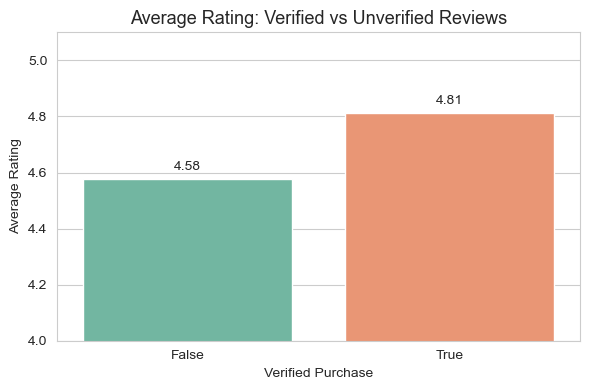

In [252]:
# Plot 
plt.figure(figsize=(6, 4))
barplot = sns.barplot(
    data=verified_avg,
    x='verified',
    y='overall',
    palette='Set2', 
    hue='verified',
    dodge=False
)

# Add labels
for p in barplot.patches:
    height = p.get_height()
    barplot.annotate(
        f'{height:.2f}',
        (p.get_x() + p.get_width() / 2., height + 0.02),
        ha='center',
        va='bottom',
        fontsize=10
    )

# Labels
plt.title('Average Rating: Verified vs Unverified Reviews', fontsize=13)
plt.xlabel('Verified Purchase')
plt.ylabel('Average Rating')
plt.ylim(4.0, 5.1)
plt.legend().remove()
plt.tight_layout()
plt.show()

## Question 2: Are there temporal trends in reviews — do ratings trend higher or lower over time?

- I extracted the **year** from the review timestamp and analyze the average rating by year.
- This helps identify trends in consumer satisfaction or product quality over time.



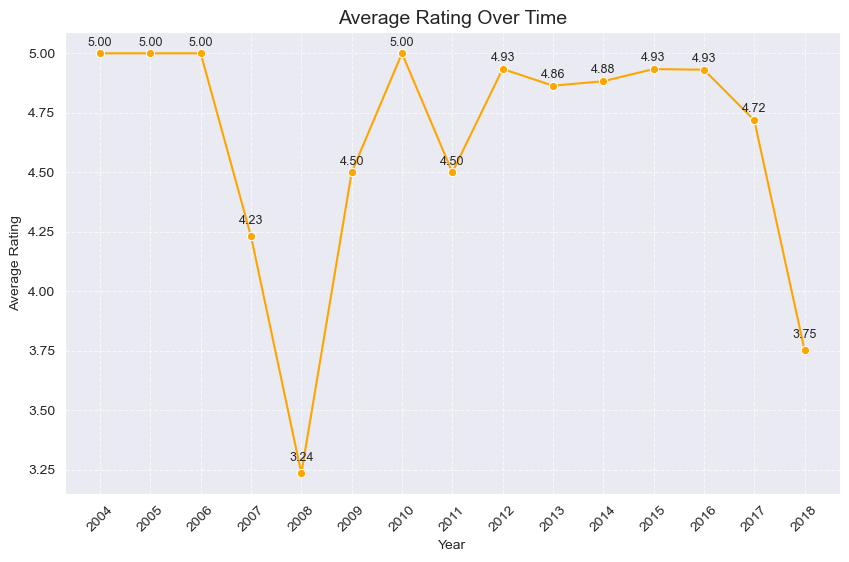

In [254]:
sns.set_style("dark")


df['reviewtime'] = pd.to_datetime(df['reviewtime'], errors='coerce')
df['review_year'] = df['reviewtime'].dt.year

plt.figure(figsize=(10, 6))
lineplot = sns.lineplot(data=yearly_avg, x='review_year', y='overall', marker='o', color='orange')

# Clean data point labels with offsets
for x, y in zip(yearly_avg['review_year'], yearly_avg['overall']):
    offset = 0.04 if y < 4.3 else 0.02  # push low points higher to avoid crowding
    plt.text(x, y + offset, f'{y:.2f}', ha='center', va='bottom', fontsize=9)


# Tidy up axis
plt.xticks(yearly_avg['review_year'], rotation=45)
plt.title('Average Rating Over Time', fontsize=14)
plt.xlabel('Year')
plt.ylabel('Average Rating')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()


## Question 3: Which brands receive the most consistent ratings?

To identify brands with the most consistent customer satisfaction, I calculated the standard deviation of star ratings for each brand. Brands with lower standard deviation values tend to receive more uniform ratings, indicating consistent experiences among customers.

This analysis helps highlight trustworthy or reliably performing brands within the beauty product category.


In [256]:
# Filter out rows with missing brand values
filtered_df = df[df['brand'].notna() & df['brand'].str.strip().ne('')]

# Group by brand and calculate std + count
brand_consistency = filtered_df.groupby('brand')['overall'].agg(['std', 'count']).reset_index()

# Keep only brands with at least 20 reviews
brand_consistency = brand_consistency[brand_consistency['count'] >= 20]

# Sort and rename
brand_consistency_sorted = brand_consistency.sort_values(by='std').head(10)
brand_consistency_sorted.rename(columns={'std': 'rating_std_dev', 'count': 'review_count'}, inplace=True)

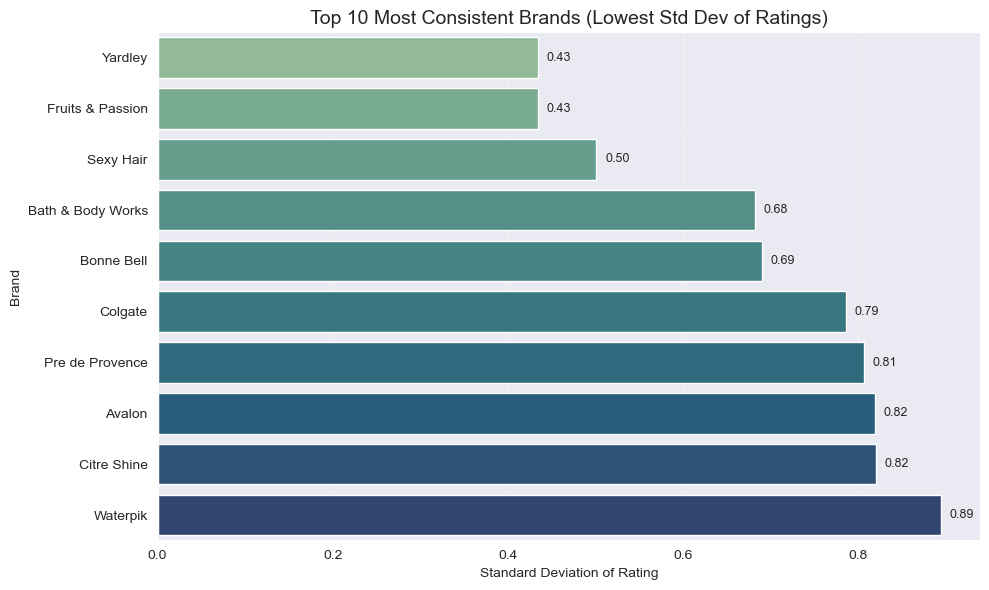

In [258]:
# Plot
plt.figure(figsize=(10, 6))
barplot = sns.barplot(
    data=brand_consistency_sorted,
    x='rating_std_dev',
    y='brand',
    hue = 'brand',
    palette='crest'
)

# Get correct y positions from bar containers
for bar in barplot.patches:
    width = bar.get_width()
    y_pos = bar.get_y() + bar.get_height() / 2
    plt.text(
        width + 0.01,       # a little to the right of the bar
        y_pos,              # vertical center of the bar
        f"{width:.2f}",     # format label
        va='center', ha='left', fontsize=9
    )

plt.title('Top 10 Most Consistent Brands (Lowest Std Dev of Ratings)', fontsize=14)
plt.xlabel('Standard Deviation of Rating')
plt.ylabel('Brand')
plt.grid(True, axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


## Question 4: Is there a correlation between the sentiment of review text and the star rating?

- Use TextBlob to calculate the sentiment polarity of each review.
- Then, we compare this sentiment score to the star rating (`overall`) left by the customer.
- To keep it clear, we filter for the top 5 most-reviewed brands.

This helps us explore whether **positively worded reviews truly correspond with high ratings**, and how that relationship may vary by brand.


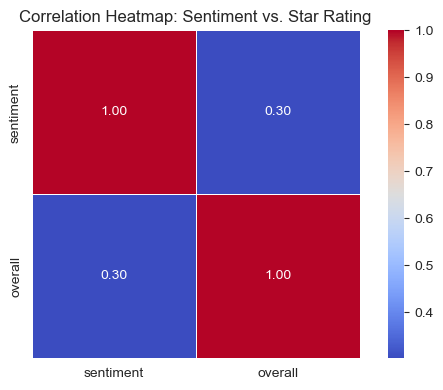

In [260]:
# Fill missing review text and calculate sentiment polarity
df['reviewtext'] = df['reviewtext'].fillna('')
df['sentiment'] = df['reviewtext'].apply(lambda x: TextBlob(x).sentiment.polarity)

# Select only the sentiment and overall rating columns
sentiment_corr_df = df[['sentiment', 'overall']]

# Calculate the correlation matrix
corr_matrix = sentiment_corr_df.corr()

# Plot the heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True, linewidths=0.5)
plt.title("Correlation Heatmap: Sentiment vs. Star Rating")
plt.tight_layout()
plt.show()


In [262]:
# Pearson correlation
correlation = df[['sentiment', 'overall']].corr().iloc[0,1]
print(f"Correlation between sentiment and star rating: {correlation:.2f}")


Correlation between sentiment and star rating: 0.30


## Final Summary of Findings

### 1. Do verified purchase reviews differ in rating compared to unverified ones?

- The analysis reveals that **verified purchase reviews** have a **higher average star rating (4.81)** compared to **unverified reviews (4.58)**.
- This suggests that verified purchasers tend to be more satisfied with their purchases, or they are more likely to leave favorable reviews.
- Verified reviews may also indicate **authentic customer experiences**, providing more reliable signals of product quality.
- In contrast, unverified reviews may include broader sentiment variance or less invested customer feedback.

---

### 2. Are there temporal trends in reviews — do ratings trend higher or lower over time?

- The average ratings have remained **consistently high**, particularly between **2004 and 2016**, with values fluctuating between **4.8 and 5.0**, indicating general customer satisfaction throughout that period.
- However, a **notable decline in average ratings appears during 2017–2018**, with a drop to around **3.75**, marking a potential shift in consumer expectations, product quality, or review behavior.
- This temporal fluctuation could reflect changes in the beauty market, product reformulations, or increased consumer scrutiny in recent years.

---

### 3. Which brands receive the most consistent ratings?

- Brands such as **Yardley** and **Fruits & Passion** demonstrate **low standard deviation in star ratings**, indicating a high level of **rating consistency** across customer reviews.
- A lower standard deviation implies customers tend to **agree on the quality** of the product, which can be interpreted as a marker of **reliable product performance**.
- These findings help identify **trustworthy brands** with strong customer satisfaction and loyalty, which could be useful for recommendation systems or market positioning analysis.

---

### 4. Is there a correlation between the sentiment of review text and the star rating?

- A **moderate positive Pearson correlation of 0.30** was observed between **TextBlob sentiment polarity scores** and the actual **star ratings**.
- This suggests that **more positive language** in review text generally correlates with **higher numeric ratings**, although the relationship is not perfect.
- The correlation provides empirical support for the assumption that **sentiment analysis can act as a proxy** for overall user satisfaction.
- However, the moderate strength also implies that sentiment does not capture all nuances of rating behavior and should be interpreted as **one contributing factor**, not a full predictor.


## Resources & Citations

#### Question #1: Do verified purchase reviews differ in rating compared to unverified ones?

- `sns.barplot(...)`
  - https://seaborn.pydata.org/generated/seaborn.barplot.html
  - https://stackoverflow.com/questions/43214978/how-to-display-custom-values-on-a-bar-plot

- `barplot.patches`
  - https://stackoverflow.com/questions/25447700/annotate-bars-with-values-on-pandas-bar-plots

- `barplot.annotate(...)`
  - https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.annotate.html

- `plt.ylim(...)` for setting y-axis range
  - https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.ylim.html

#### Question #2: Are there temporal trends in reviews?

- `pd.to_datetime`
  - https://pandas.pydata.org/docs/reference/api/pandas.to_datetime.html

- `df['reviewtime'].dt.year`
  - https://stackoverflow.com/questions/30405413/pandas-extract-year-from-datetime-dfyear-dfdate-year-is-not-working

- Annotating line plot with `plt.text(...)`
  - https://stackoverflow.com/questions/31412831/add-labels-to-a-line-plot-in-matplotlib

#### Question #3
- Filtering missing or blank brand names:
  - `df['brand'].notna() & df['brand'].str.strip().ne('')`
  - https://stackoverflow.com/questions/29530232/how-to-check-if-a-pandas-dataframe-row-is-empty

- Grouping and aggregating std + count:
  - `groupby(...).agg(['std', 'count'])`
  - https://pandas.pydata.org/docs/user_guide/groupby.html
  - https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.agg.html

- Filtering by count threshold:
  - `brand_consistency[brand_consistency['count'] >= 20]`
  - https://stackoverflow.com/questions/15622808/filtering-a-pandas-dataframe

- Sorting and renaming columns:
  - `sort_values(by='std').head(10)`
  - https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.sort_values.html
  - https://stackoverflow.com/questions/11346283/renaming-columns-in-pandas

- Annotating bars using patch widths:
  - `bar.get_width()` and `bar.get_y()`
  - https://stackoverflow.com/questions/25447700/annotate-bars-with-values-on-bar-plot


#### Question #4: Is there a correlation between the sentiment of review text and the star rating?

- `TextBlob` for sentiment analysis
  - https://textblob.readthedocs.io/en/dev/quickstart.html#sentiment-analysis
  - https://www.geeksforgeeks.org/python-sentiment-analysis-using-textblob/

- `apply(lambda x: TextBlob(x).sentiment.polarity)`
  - https://stackoverflow.com/questions/38987/how-do-i-merge-two-dictionaries-in-a-single-expression-in-python

- `df[['sentiment', 'overall']].corr()`
  - https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.corr.html